Predict student marks based on age.


In [69]:
import pandas as pd
dataset = pd.read_csv("Student.csv")
dataset.head()

,Name,Roll No,Age,Marks
0,Zaid,1,18.0,60.0
1,Zaki,2,20.0,NaN
2,Priya,3,20.0,78.0
3,Rahul,4,21.0,83.5
4,Neha,5,19.0,70.0


In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     15 non-null     object 
 1   Roll No  15 non-null     int64  
 2   Age      13 non-null     float64
 3   Marks    13 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 608.0+ bytes


In [71]:
dataset.isnull().sum()

Name       0
Roll No    0
Age        2
Marks      2
dtype: int64

The dataset contains student Name, Roll No., Age and Marks.
Missing values are present and will be handled before modeling.


In [72]:
dataset["Age"] = dataset["Age"].fillna(dataset["Age"].mean())
dataset["Marks"] = dataset["Marks"].fillna(dataset["Marks"].mean())
dataset.isnull().sum()

Name       0
Roll No    0
Age        0
Marks      0
dtype: int64

Missing numerical values were filled using the mean to preserve dataset size.


In [73]:
x = dataset[["Age"]]
y = dataset["Marks"]

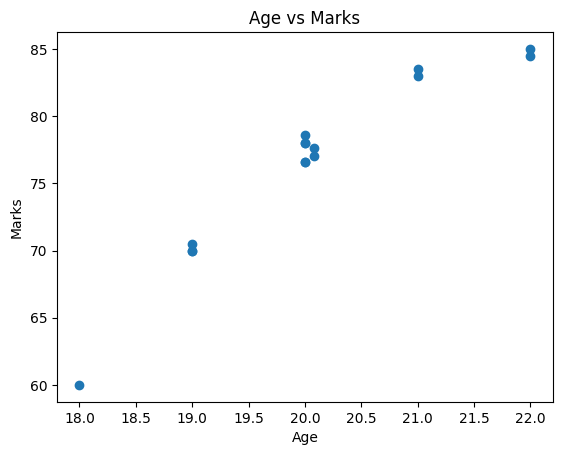

In [74]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel("Age")
plt.ylabel("Marks")
plt.title("Age vs Marks")
plt.show()

The scatter plot shows no clear linear relationship between age and marks.
A linear model may not capture the underlying pattern well.


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [77]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [78]:
y_pred = model1.predict(x_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 19.13297640161402
R2 Score: 0.5890068309529413


Linear regression performed poorly due to the absence of a linear relationship.

In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
poly = PolynomialFeatures(degree=2, include_bias=False)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


In [81]:
model2 = LinearRegression()
model2.fit(x_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [82]:
y2_pred = model2.predict(x_test_poly)

print("MSE:", mean_squared_error(y_test, y2_pred))
print("R2 Score:", r2_score(y_test, y2_pred))


MSE: 0.401406518280498
R2 Score: 0.9913774347722327


/home/mohammad/miniconda3/envs/mldl/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


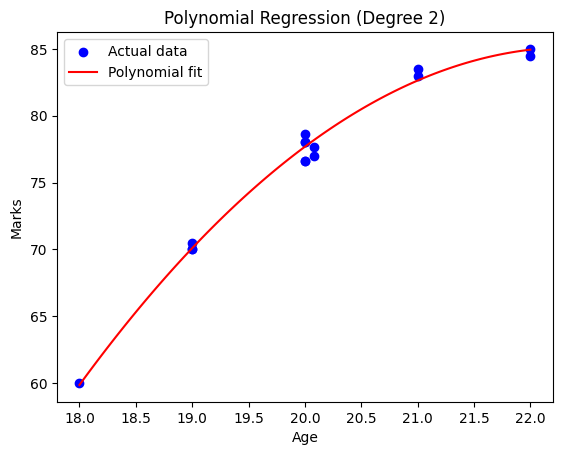

In [84]:
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = model2.predict(x_range_poly)

plt.scatter(x, y, color="blue", label="Actual data")
plt.plot(x_range, y_range_pred, color="red", label="Polynomial fit")
plt.xlabel("Age")
plt.ylabel("Marks")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()


Linear regression performed poorly due to the absence of a linear relationship.
Decision Tree Regression is more suitable as it can model non-linear patterns.


In [85]:
dataset2 = pd.read_csv("linear_data.csv")
dataset2.head()

,Name,Roll No,Age,Marks
0,Zaid,1,18.0,60.0
1,Zaki,2,20.0,NaN
2,Priya,3,20.0,70.0
3,Rahul,4,21.0,75.2
4,Neha,5,19.0,65.0


In [86]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     15 non-null     object 
 1   Roll No  15 non-null     int64  
 2   Age      13 non-null     float64
 3   Marks    13 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 608.0+ bytes


In [87]:
dataset2.isnull().sum()

Name       0
Roll No    0
Age        2
Marks      2
dtype: int64

The dataset contains student Name, Roll No., Age and Marks. Missing values are present and will be handled before modeling.

In [88]:
dataset2["Age"] = dataset2["Age"].fillna(dataset2["Age"].mean())
dataset2["Marks"] = dataset2["Marks"].fillna(dataset2["Marks"].mean())
dataset2.isnull().sum()

Name       0
Roll No    0
Age        0
Marks      0
dtype: int64

Missing numerical values were filled using the mean to preserve dataset size.

In [89]:
X = dataset2[["Age"]]
Y = dataset2["Marks"]

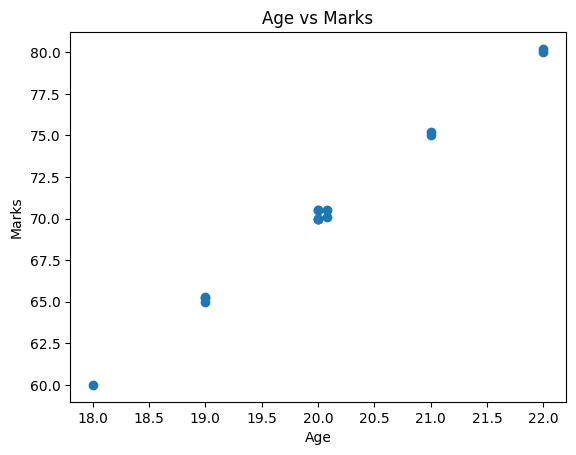

In [95]:
plt.scatter(X, Y)
plt.xlabel("Age")
plt.ylabel("Marks")
plt.title("Age vs Marks")
plt.show()

The scatter plot shows a clear positive linear relationship between age and marks.
Linear regression is suitable for this dataset.


In [91]:
x_train_lr,x_test_lr,y_train_lr,y_test_lr = train_test_split(X, Y, test_size=0.2, random_state=42)

In [92]:
model_lr = LinearRegression()
model_lr.fit(x_train_lr,y_train_lr)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [93]:
y_pred_lr = model_lr.predict(x_test_lr)

print("MSE:", mean_squared_error(y_test_lr, y_pred_lr))
print("R2 Score:", r2_score(y_test_lr, y_pred_lr))

MSE: 0.06393046323728777
R2 Score: 0.9965183382395586


The model achieves a high R² score, indicating that a large portion of the variance in marks is explained by age.

This confirms that linear regression fits the data well.

Conclusion:

Model selection was guided by EDA.
Linear regression was effective only when a linear relationship existed.

For non-linear patterns, tree-based models provided better flexibility and performance.
